Возьмите датасет с цветками iris’а (функция load_iris из библиотеки sklearn)
Оставьте два признака - sepal_length и sepal_width и целевую переменную - variety
Разделите данные на выборку для обучения и тестирования
Постройте модель LDA
Визуализируйте предсказания для тестовой выборки и центры классов
Отбросьте целевую переменную и оставьте только два признака - sepal_length и sepal_width
Подберите оптимальное число кластеров для алгоритма kmeans и визуализируйте полученную кластеризацию

In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors

In [2]:
iris = load_iris()

In [3]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [4]:
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)

In [5]:
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [7]:
filtr_iris = df_iris.filter(items = ['sepal length (cm)', 'sepal width (cm)'])
filtr_iris.head()

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [9]:
variety = iris.target

In [10]:
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(filtr_iris, variety, test_size=0.30)

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [14]:
LDA = LinearDiscriminantAnalysis()

In [15]:
LDA.fit(X_train, y_train)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [16]:
LDA.predict(X_test)

array([1, 0, 1, 1, 2, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 0, 1, 2, 1,
       2, 0, 1, 1, 0, 1, 2, 0, 1, 0, 0, 2, 1, 0, 1, 2, 2, 1, 2, 2, 0, 2,
       0])

In [17]:
result = pd.DataFrame([y_test, LDA.predict(X_test)]).T

In [18]:
result

,0,1
0,2,1
1,0,0
2,1,1
3,1,1
4,1,2
5,2,1
6,1,1
7,2,1
8,2,2
9,1,2


In [32]:
from sklearn.metrics import accuracy_score

In [33]:
accuracy_score(y_test, LDA.predict(X_test))

0.7333333333333333

In [34]:
LDA.coef_

array([[-5.96913972,  8.07128643],
       [ 2.24434167, -4.87556617],
       [ 4.89027601, -4.65659128]])

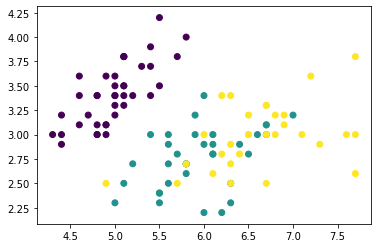

In [35]:
plt.scatter(X_train['sepal length (cm)'], X_train['sepal width (cm)'], c=y_train)
plt.show()

In [36]:
small_train01 = X_train[(y_train == 0) | (y_train == 1) ]
small_train01 = small_train01[['sepal length (cm)', 'sepal width (cm)']]
sy_train01 = y_train[(y_train == 0) | (y_train == 1) ]
small_test01 = X_test[(y_test == 0) | (y_test == 1) ]
small_test01 = small_test01[['sepal length (cm)', 'sepal width (cm)']]
sy_test01 = y_test[(y_test == 0) | (y_test == 1) ]

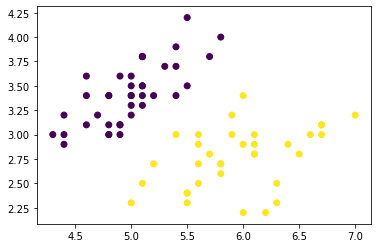

In [37]:
plt.scatter(small_train01['sepal length (cm)'], small_train01['sepal width (cm)'], c=sy_train01)
plt.show()

In [38]:
LDA_cl_01 = LinearDiscriminantAnalysis()
LDA_cl_01.fit(small_train01, sy_train01)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [39]:
LDA_cl_01.means_

array([[4.98717949, 3.41538462],
       [5.95      , 2.75882353]])

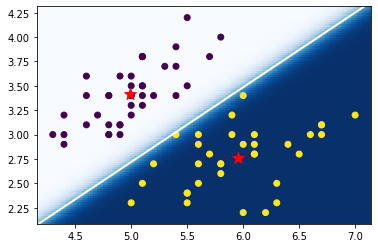

In [42]:
plt.scatter(small_train01['sepal length (cm)'], small_train01['sepal width (cm)'], c=sy_train01)

plt.scatter(LDA_cl_01.means_[:, 0], LDA_cl_01.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = LDA_cl_01.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='Blues',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

Эта модель лучше, чем следующая ниже. Здесь оба признака хорошо разделены и одинаково важны.

In [43]:
small_train02 = X_train[(y_train == 0) | (y_train == 2)]
small_train02 = small_train02[['sepal length (cm)', 'sepal width (cm)']]
sy_train02 = y_train[(y_train == 0) | (y_train == 2)]
small_test02 = X_test[(y_test == 0) | (y_test == 2)]
small_test02 = small_test02[['sepal length (cm)', 'sepal width (cm)']]
sy_test02 = y_test[(y_test == 0) | (y_test == 2)]

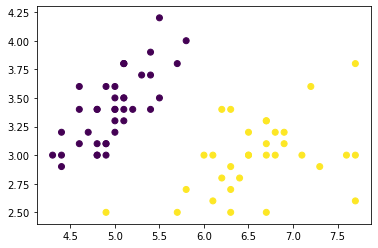

In [44]:
plt.scatter(small_train02['sepal length (cm)'], small_train02['sepal width (cm)'], c=sy_train02)
plt.show()

In [45]:
LDA_cl_02 = LinearDiscriminantAnalysis()
LDA_cl_02.fit(small_train02, sy_train02)

LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [46]:
LDA_cl_02.means_

array([[4.98717949, 3.41538462],
       [6.603125  , 2.9875    ]])

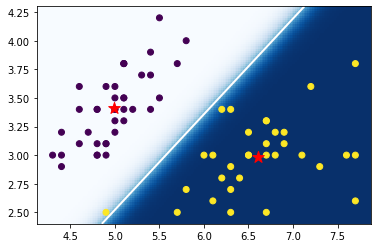

In [48]:
plt.scatter(small_train02['sepal length (cm)'], small_train02['sepal width (cm)'], c=sy_train02)
plt.scatter(LDA_cl_02.means_[:, 0], LDA_cl_02.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = LDA_cl_02.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='Blues',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

Здесь один признак выходит за пределы линии разделения. Эта модель будет похуже.

In [79]:
df_iris.rename({'sepal length (cm)': 'sepal_length', 'sepal width (cm)': 'sepal_width'}, axis=1, inplace=True)

In [80]:
filtr_iris2 = df_iris.filter(items = ['sepal_length', 'sepal_width'])
filtr_iris2.head()

,sepal_length,sepal_width
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6


In [81]:
from sklearn.datasets import make_moons, make_blobs

In [82]:
X, y = make_blobs(n_samples=150, centers=4, cluster_std=2.5)

In [83]:
X

array([[ 1.19272530e+00, -1.33074758e+01],
       [ 6.31166120e+00,  9.11427635e+00],
       [ 5.45120977e+00,  1.90237369e+00],
       [ 6.10222887e+00,  2.23418751e+00],
       [ 4.57714489e+00, -1.09991995e+01],
       [-2.18044961e+00, -4.78397936e+00],
       [ 5.03375986e-02,  2.76347609e+00],
       [ 1.25504764e+01,  5.50135396e+00],
       [ 6.05660006e-01, -9.15224539e+00],
       [ 5.84211213e+00,  3.20454565e+00],
       [-3.53286469e+00, -2.24090155e+00],
       [ 2.03271278e+00, -1.16995541e+01],
       [ 9.84296624e+00,  3.84326289e+00],
       [-3.31782086e+00,  5.55172657e-01],
       [ 2.17519119e+00, -6.87410493e+00],
       [-7.95203355e+00, -5.78274030e+00],
       [ 8.32050208e+00,  3.71309646e+00],
       [ 1.47623948e+01,  6.23458615e-01],
       [ 3.70013647e+00, -3.74706966e+00],
       [ 9.50788351e+00,  1.41370799e+00],
       [-9.41005865e-01, -5.57660196e+00],
       [ 2.12677082e+00, -6.42229950e+00],
       [ 6.34138241e+00,  5.95336788e+00],
       [ 2.

In [84]:
y

array([0, 1, 3, 1, 0, 2, 1, 3, 0, 1, 2, 0, 3, 2, 0, 2, 3, 3, 2, 3, 2, 0,
       1, 1, 1, 1, 3, 0, 3, 1, 2, 2, 1, 3, 3, 3, 2, 0, 0, 1, 2, 2, 3, 2,
       1, 2, 0, 1, 0, 2, 2, 1, 3, 2, 1, 3, 0, 3, 0, 1, 3, 1, 0, 2, 1, 1,
       3, 1, 1, 2, 0, 0, 0, 3, 2, 1, 0, 3, 0, 2, 3, 3, 1, 0, 0, 1, 0, 3,
       2, 0, 3, 1, 1, 3, 0, 2, 2, 3, 0, 0, 0, 3, 3, 1, 1, 3, 0, 3, 2, 0,
       1, 2, 2, 1, 1, 0, 2, 1, 1, 3, 0, 0, 3, 3, 3, 2, 2, 0, 2, 0, 2, 3,
       0, 2, 2, 1, 1, 2, 2, 0, 0, 1, 1, 1, 3, 2, 2, 3, 3, 0])

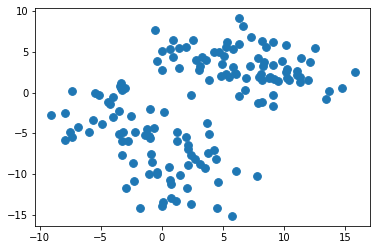

In [85]:
plt.scatter(X[:, 0], X[:, 1], cmap='autumn', s=60)

In [86]:
from sklearn.preprocessing import StandardScaler

In [87]:
scaler = StandardScaler()

In [88]:
X_scaled = scaler.fit_transform(X)

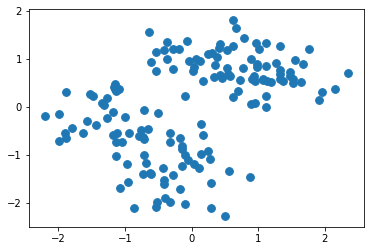

In [89]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', s=60)

In [90]:
from sklearn.cluster import KMeans

In [97]:
kmeans = KMeans(n_clusters=2)

clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0])

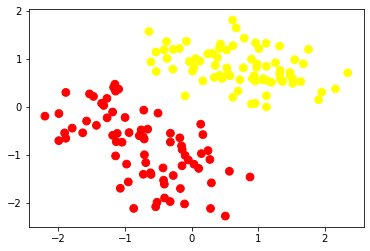

In [98]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [99]:
kmeans = KMeans(n_clusters=5)

clusters = kmeans.fit_predict(X_scaled)
clusters

array([4, 1, 1, 1, 0, 3, 1, 2, 4, 1, 3, 4, 2, 3, 0, 3, 2, 2, 0, 2, 3, 0,
       1, 1, 1, 1, 2, 4, 2, 1, 3, 3, 1, 2, 2, 2, 3, 0, 4, 1, 3, 3, 1, 4,
       1, 3, 4, 2, 0, 3, 0, 1, 2, 3, 1, 2, 4, 2, 0, 1, 2, 2, 4, 3, 2, 1,
       2, 1, 1, 3, 0, 4, 0, 2, 3, 2, 0, 2, 0, 3, 2, 2, 1, 0, 4, 1, 4, 2,
       3, 0, 1, 2, 1, 1, 3, 3, 3, 2, 4, 4, 0, 2, 2, 1, 1, 2, 4, 2, 3, 0,
       1, 3, 3, 1, 1, 0, 3, 1, 1, 2, 4, 4, 2, 2, 2, 3, 3, 4, 3, 0, 3, 2,
       3, 3, 3, 1, 1, 3, 3, 4, 4, 2, 2, 1, 2, 3, 3, 2, 2, 4])

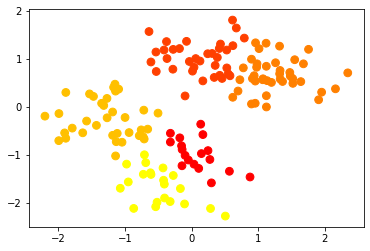

In [100]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

Перепробовала все варианты до 6 кластеров вкл. 2 - самый оптимальный вариант.

In [63]:
k_inertia = []

ks = range(1, 10)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)

    k_inertia.append(clf_kmeans.inertia_)

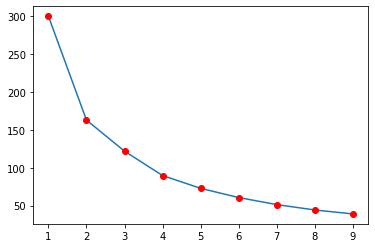

In [64]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')